<a href="https://colab.research.google.com/github/robomoan/Data_Science_Study/blob/main/hg_ml_ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch4. 다양한 분류 알고리즘
럭키백의 확률 계산

## 로지스틱 회귀

### 데이터 준비하기

In [37]:
import pandas as pd
fish = pd.read_csv("https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [38]:
# 타깃 데이터가 될 물고기의 종류
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [39]:
# 물고기의 종류를 제외한 나머지 데이터로 인풋 데이터로 분리
fish_input = fish.iloc[:, 1:].to_numpy()

In [40]:
print(fish_input[0:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [41]:
# 물고기의 종류를 타깃 데이터로 분리
fish_target = fish['Species'].to_numpy()

In [42]:
# 데이터를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [43]:
# 훈련 세트의 통계값으로 훈련 세트와 테스트 세트 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### K-최근접 이웃 분류기의 확률 예측

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [45]:
# KNeighborsClassifier에 저장된 타깃 데이터는 알파벳 순서로 정렬되어있다.
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [46]:
# 테스트 세트 처음 5개 샘플 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [47]:
# 처음 5개 샘플에 대한 확률 출력
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [48]:
# 네번째 샘플의 근접 이웃 구하기
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


네번째 샘플의 Perch 확률이 2/3 = 0.6667임을 확인할 수 있다.

### 로지스틱 회귀

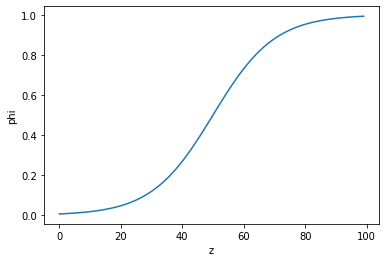

In [49]:
# 시그모이드 함수
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 회귀로 이진분류 수행하기

In [50]:
# 훈련 세트의에서 도미와 빙어 행만 골라내기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [51]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# 예측하기
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [53]:
# 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [54]:
# 각각이 어떤 타깃값인지
print(lr.classes_)

['Bream' 'Smelt']


In [55]:
# 회귀모델의 계수 확인하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


회귀모델의 방정식  
$z = -0.404 \times (Weight) -0.576 \times (Length) -0.663 \times (Diagonal) -1.013 \times (Height) -0.732 \times (Width) - 2.161$

In [56]:
# 처음 5개 샘플의 z 값 (시그모이드 함수에 넣기 전 값) 구하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [57]:
# scify에서 시그모이드 함수 제공
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


이는 predict_proba() 매서드 출력의 2번째 열의 값과 동일  
decision_function() 메서드는 양성 클래스(1, 여기서는 Smelt)에 대한 z 값을 반환한다.

#### 로지스틱 회귀로 다중 분류 수행하기

In [58]:
# 로지스틱 회귀 다중 분류 모델 훈련하기
lr = LogisticRegression(C = 20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


LogisticRegresson() 클래스의 파라메터  
C: L2 규제의 강도, 작을수록 규제가 커짐, 디폴트값은 1  
max_iter: 반복 횟수, 디폴트값은 100

In [59]:
# 테스트 세트의 처음 5개 샘플에 대한 예측 확인
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [60]:
# 처음 5개 샘플에 대한 확률 출력
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, 3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [61]:
# 다중 분류 선형방정식의 크기 출력
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중 분류 모델은 시그모이드 함수가 아닌 소프트맥스 함수에 넣어 확률을 구함  
소프트맥스 함수는 지수함수 $e^z$의 가중치 비율

In [62]:
# 처음 5개 샘플의 z값 (소프트맥스 함수에 넣기 전의 값) 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [63]:
# scipy에서 소프트맥스 함수를 제공
from scipy.special import softmax
proba = softmax(decision, axis = 1) # 각 행에 대해서 계산, 이 파라메터를 넣지 않으면 전체 샘플에 대해 소프트맥스 실행
print(np.round(proba, 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


predict_proba() 메서드를 이용해 구한 값과 동일함을 확인할 수 있다.

## 확률적 경사 하강법

#### SGDClassifier
Stochastic Gradient Decent

In [64]:
# 데이터 불러오기
import pandas as pd
fish = pd.read_csv("https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fish.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [65]:
# 인풋 데이터, 타깃 데이터 나누기
fish_input = fish.iloc[:, 1:].to_numpy()
fish_target = fish['Species'].to_numpy()

# 인풋 데이터를 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

# 훈련 세트의 통계량으로 훈련 세트와 테스트 세트 표준화하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

SGDClassifier()의 파라메터  
- loss: 손실함수 지정 'log'는 로지스틱 손실함수, 디폴트값은 'hinge'  
- max_iter: 수행할 에포크 횟수, 디폴트값은 1000
- penalty: 규제의 종류 지정, 디폴트값은 'l2' L2 규제, L1 규제를 적용하려면 'l1'
- tol: 반복을 멈출 조건: n_iter_no_change 파라메터에서 지정한 에포크 동안 손실이 tol만큼 줄어들지 않으면 알고리즘이 중단됨, 디폴트값은 0.001, n_ter_no_change의 디폴트값은 5

In [66]:
# 확률적 경사 하강 분류기
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


반복횟수가 부족하다는 뜻의 ConvergenceWarning 경고를 출력

In [67]:
# 에포크 추가 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


#### 에포크의 과대/과소적합

partial_fit() 매서드만 사용하려면 훈련 세트의 전체 클래스의 목록을 partial_fit() 매서드에 전달해주어야 한다.

In [68]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [69]:
# 300번의 에포크 동안 훈련 반복 진행하여 점수 변화 비교
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

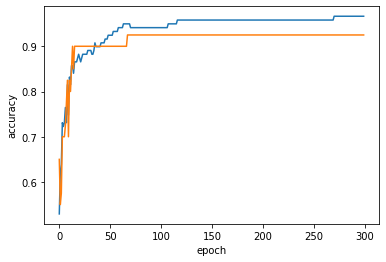

In [70]:
# 훈련 세트와 테스트 세트의 점수 변화 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프  
100번째 에포크가 적절한 반복횟수로 보임

In [71]:
# 에포크 100번 반복
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier() 매서드의 loss 파라메터의 기본값인 'hinge'는 서포트 벡터 머신을 위한 손실함수인 힌지 손실 함수다.

In [72]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
